In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df.iloc[:,3:]

In [5]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []
for i in range(1,15):
    kmean = KMeans(n_clusters=i,init='k-means++',random_state=30)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
    

In [8]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30273.394312070042,
 25311.63315295815,
 21850.165282585633,
 19641.456216651568,
 17887.084456628647,
 15990.444512350397,
 14666.175194043304,
 12797.180630643867]

Text(0.5, 1.0, 'Elbow Plot')

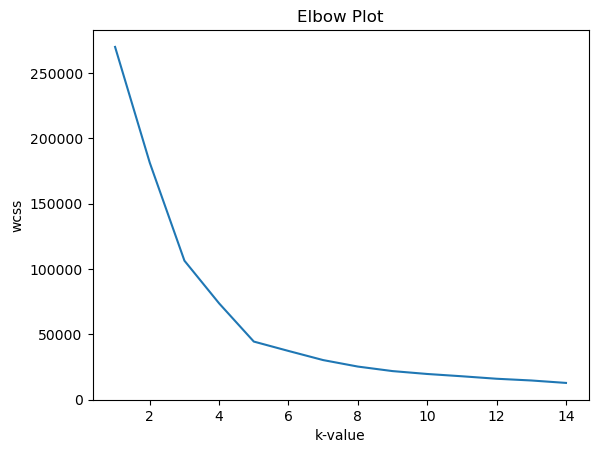

In [9]:
plt.plot(range(1,15),wcss)
plt.xlabel('k-value')
plt.ylabel('wcss')
plt.title('Elbow Plot')

##### From the above graph we can see until 5 it is decreasing then it is constant, so we take number of clusters=5

In [10]:
kmean1 = KMeans(n_clusters=5,init='k-means++',random_state=30)
x['cluster_number'] = kmean1.fit_predict(x)

In [11]:
x

,Annual Income (k$),Spending Score (1-100),cluster_number
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,2
197,126,74,3
198,137,18,2


In [12]:
x[x['cluster_number'] == 2]

,Annual Income (k$),Spending Score (1-100),cluster_number
124,70,29,2
128,71,11,2
130,71,9,2
134,73,5,2
136,73,7,2
138,74,10,2
140,75,5,2
144,77,12,2
146,77,36,2
148,78,22,2


In [13]:
kmean1.predict([[20,79]])

array([0])

In [14]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples=3)

In [15]:
data1 = pd.read_csv("Mall_Customers.csv")

In [16]:
data1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
data1 = data1.iloc[:,3:]

In [18]:
data1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [19]:
scaled_data = dbscan.fit(data1)

In [20]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,
        0, -1, -1, -1, -1, -1,  1,  2,  2,  1,  2, -1,  2,  2, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1,  3, -1,  4, -1, -1,  3,  4,  3,  4, -1,
       -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1,  5, -1,
       -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [21]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4, 5}

In [22]:
data1['cluster number'] = dbscan.labels_

In [23]:
data1

,Annual Income (k$),Spending Score (1-100),cluster number
0,15,39,-1
1,15,81,-1
2,16,6,-1
3,16,77,-1
4,17,40,-1
...,...,...,...
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1


In [24]:
from sklearn import metrics

In [25]:
metrics.adjusted_rand_score(x['cluster_number'],dbscan.labels_)

-0.05702733098672127

In [26]:
metrics.jaccard_score(x['cluster_number'],dbscan.labels_,average='macro')

0.005291005291005291